In [1]:
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save
import tikzplotlib as tikzpl
from scipy import integrate
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)
plt.rcParams.update({
    "pgf.rcfonts": False,
    "font.family": "serif",  # use serif/main font for text elements
    "font.serif": ['Tex Gyre Pagella'],
    "text.usetex": True,     # use inline math for ticks
    'pgf.texsystem': 'lualatex',
    "pgf.preamble": "\n".join([
        r"\PassOptionsToPackage{osf,sc}{mathpazo}",
        r"\RequirePackage{mathpazo}",
        r"\usepackage{pgfplots}",
        r"\usepgfplotslibrary{external}",
        r"\tikzexternalize",
    ])
})

In [3]:
for i in range (0,8):
    subA=pd.read_csv('/media/andres/LFD/andres/newDomain/V083/14Hz/fluid/data/vorticityInstantaneous{}.csv'.format(i),skiprows=1)
    appA=subA.to_numpy()
    if i==0:
        A=subA.to_numpy()
    else:
        A=np.append(A,appA,0)
data=A
f=14 #Hz
fplus=f/13.27 #Hz

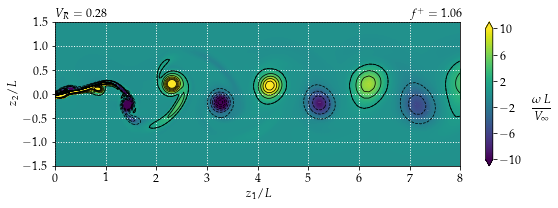

In [28]:
vortAdim=data[:,7]
x=(data[:,8]-0.031)/0.035
y=(data[:,9]-0.03)/0.035
#Niveles
levels=np.linspace(-10,10,200)
levelsNeg=np.linspace(-15,1,7)
levelsPos=np.linspace(1,15,7)
#Metemos LaTeX
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
#Creamos la figura y los ejes.
fig, ax = plt.subplots(figsize=(8,3))
#Ploteamos
Campo = plt.tricontourf(x,y,vortAdim,levels=levels, extend='both')
for c in Campo.collections:
    c.set_edgecolor("face")
plt.tricontour(x,y,vortAdim,levels=levelsPos,colors='k',linewidths=0.75)
plt.tricontour(x,y,vortAdim,levels=levelsNeg,colors='k',linestyles='dashed',linewidths=0.75)
#Configuramos límites de los ejes.
ax.set(xlim=(0, 8), ylim=(-1.5, 1.5))
ax.set_xlabel(r'$z_1/L$',size=12)
ax.set_ylabel(r'$z_2/L$',size=12)
ax.set_title('$V_R=0.28$',loc='left')
ax.set_title('$f^+={:0.2f}$'.format(fplus),loc='right')
#Formato
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#Definimos y configuramos la colorbar
CB=plt.colorbar(Campo, ticks=np.linspace(-10,10,6))
CB.ax.tick_params(labelsize=12)
CB.ax.set_ylabel(r'$\displaystyle\frac{\omega\,L}{V_\infty}$',rotation=0, size=12, labelpad=20)
plt.grid()
ax.grid(axis='both',which='both',color='white', linestyle=':', linewidth=1,zorder=1000)
plt.tight_layout()
plt.savefig('VortInstant-083ms-14Hz.pdf')
plt.savefig('VortInstant-083ms-14Hz.png')

In [2]:
dataNew=np.zeros((101,59972,12))
for j in range (0,101):
    for i in range (0,8):
        if i==7:
            i=8
        subA=pd.read_csv('/media/andres/LFD/andres/newDomain/V083/10Hz/fluid/data/trayectoria/trayVort{}.{}.csv'.format(i,j),skiprows=1)
        appA=subA.to_numpy()
        if i==0:
            A=subA.to_numpy()
        else:
            A=np.append(A,appA,0)
    dataNew[j]=A
f=10 #Hz
fplus=f/13.27 #Hz

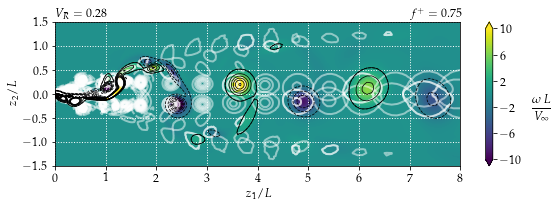

In [3]:
Q=dataNew[:,:,0]
x=(dataNew[0,:,9]-0.031)/0.035
y=(dataNew[0,:,10]-0.03)/0.035
vortZ=dataNew[:,:,7]
vortNorm=vortZ*0.035/0.83
#Niveles
levels=1000
levelsVort=np.linspace(-10,10,200)
levelsNeg=np.linspace(-15,1,7)
levelsPos=np.linspace(1,15,7)
#Metemos LaTeX
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
#Creamos la figura y los ejes.
fig, ax = plt.subplots(figsize=(8,3))
#Ploteamos
Campo=plt.tricontourf(x,y,vortNorm[5,:],levels=levelsVort,extend='both')
for k in range (0,101,25):
    plt.tricontour(x,y,Q[k,:],levels=levels,linewidths=2,colors='white',alpha=0.5)
#for c in Campo.collections:
    #c.set_edgecolor("face")
plt.tricontour(x,y,vortNorm[5,:],levels=levelsPos,colors='k',linewidths=0.75)
plt.tricontour(x,y,vortNorm[5,:],levels=levelsNeg,colors='k',linestyles='dashed',linewidths=0.75)
#Configuramos límites de los ejes.
ax.set(xlim=(0, 8), ylim=(-1.5, 1.5))
ax.set_xlabel(r'$z_1/L$',size=12)
ax.set_ylabel(r'$z_2/L$',size=12)
ax.set_title('$V_R=0.28$',loc='left',size=12)
ax.set_title('$f^+={:0.2f}$'.format(fplus),loc='right',size=12)
#Formato
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#Definimos y configuramos la colorbar
CB=plt.colorbar(Campo, ticks=np.linspace(-10,10,6))
CB.ax.tick_params(labelsize=12)
CB.ax.set_ylabel(r'$\displaystyle\frac{\omega\,L}{V_\infty}$',rotation=0, size=12, labelpad=20)
plt.grid()
ax.grid(axis='both',which='both',color='white', linestyle=':', linewidth=1,zorder=1000)
plt.tight_layout()
plt.savefig('TrayectoriaVortices-083ms-10Hz.pdf')
plt.savefig('TrayectoriaVortices-083ms-10Hz.png')
plt.show()

In [14]:
dataWake=np.zeros((1000,23))
A=pd.read_csv('/media/andres/LFD/andres/newDomain/V083/14Hz/fluid/data/xWake.csv',skiprows=1)
dataWake=A.to_numpy()
B=pd.read_csv('/media/andres/LFD/andres/newDomain/V083/14Hz/fluid/data/xUpstream.csv',skiprows=1)
dataUpstream=B.to_numpy()

In [36]:
y=dataWake[:,21]
VxMedioWake=dataWake[:,2]
VxFluctuacionWake=(dataWake[:,5]**2)
VyFluctuacionesWake=dataWake[:,6]**2
VxMedioUpstream=dataUpstream[:,2]
VxFluctuacionUpstream=(dataUpstream[:,5]**2)
pWake=dataWake[:,8]*1.205
pUpstream=dataUpstream[:,8]*1.205
integrand1=1.205*VxMedioWake**2-1.205*VxMedioUpstream**2
integrand2=pWake-pUpstream
integrand3=-1.205*VxFluctuacionUpstream+1.205*VxFluctuacionWake
integral1=integrate.simpson(integrand1,y)
integral2=integrate.simpson(integrand2,y)
integral3=integrate.simpson(integrand3,y)
print('Integral 1:',integral1)
print('Integral 2:',integral2)
print('Integral 3:',integral3)
F=-(integral1+integral2+integral3)
print('F:',F)
CD=F/(0.5*1.205*(0.83**2)*0.0125)
print('CD:',CD)

Integral 1: 0.0008092730332848995
Integral 2: -0.0005349110312807595
Integral 3: 0.00025954658869409357
F: -0.0005339085906982336
CD: -0.10290670196063044


In [67]:
y=dataWake[:,21]
VxMedioWake=dataWake[:,2]
VxFluctuacionWake=(dataWake[:,5])
pWake=dataWake[:,8]*1.205
integrand1=1.205*VxMedioWake*(0.83-VxMedioWake)
integrand2=pWake
integrand3=1.205*VxFluctuacionWake*VxFluctuacionWake
integral1=integrate.simpson(integrand1,y)
integral2=integrate.simpson(integrand2,y)
integral3=integrate.simpson(integrand3,y)
print('Integral 1:',integral1)
print('Integral 2:',integral2)
print('Integral 3:',integral3)
F=(integral1+integral2-integral3)
print('F:',F)
CD=F/(0.5*1.205*(0.83**2)*0.0125)
print('CD:',CD)

Integral 1: -0.0007636432527919843
Integral 2: -0.14156631869716152
Integral 3: 0.0002597300608952923
F: -0.1425896920108488
CD: -27.483047087196926
